In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime

%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2/5/2010,24924.50,False
1,1,1,2/12/2010,46039.49,True
2,1,1,2/19/2010,41595.55,False
3,1,1,2/26/2010,19403.54,False
4,1,1,3/5/2010,21827.90,False


In [4]:
strp = datetime.datetime.strptime

In [5]:
train['Date'] = train['Date'].apply(lambda x : pd.to_datetime(x))

In [6]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [7]:
features = pd.read_csv('features.csv')

In [8]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [9]:
features['Date'] = features['Date'].apply(lambda x: pd.to_datetime(x))

In [10]:
stores = pd.read_csv('stores.csv')

In [11]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [12]:
merged_features_stores = pd.merge(features, stores, on='Store', how='right')

#merged_features_stores.head()

In [13]:
import missingno as msno

<AxesSubplot:>

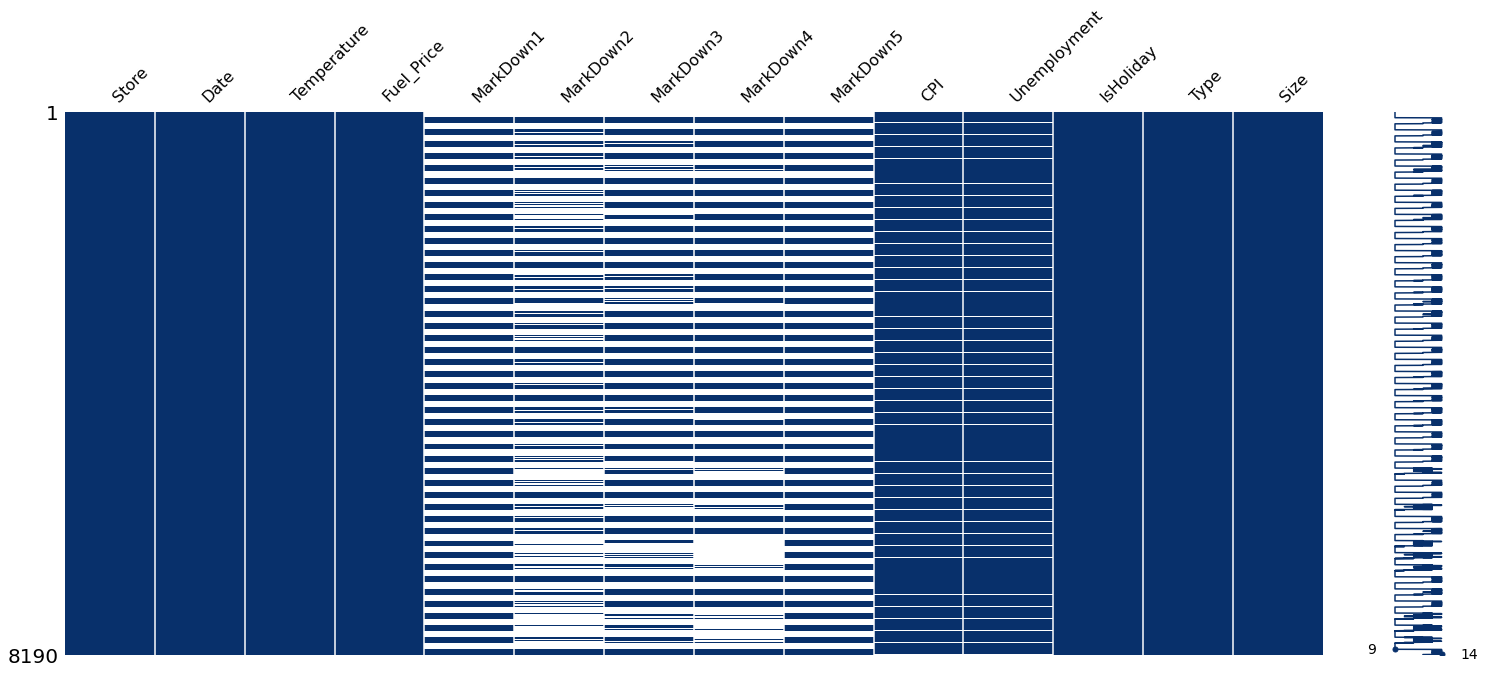

In [14]:
msno.matrix(merged_features_stores, color=(8/255, 48/255, 107/255))

In [15]:
merged_all = pd.merge(train, merged_features_stores, on=["Date", "Store"], how="left")

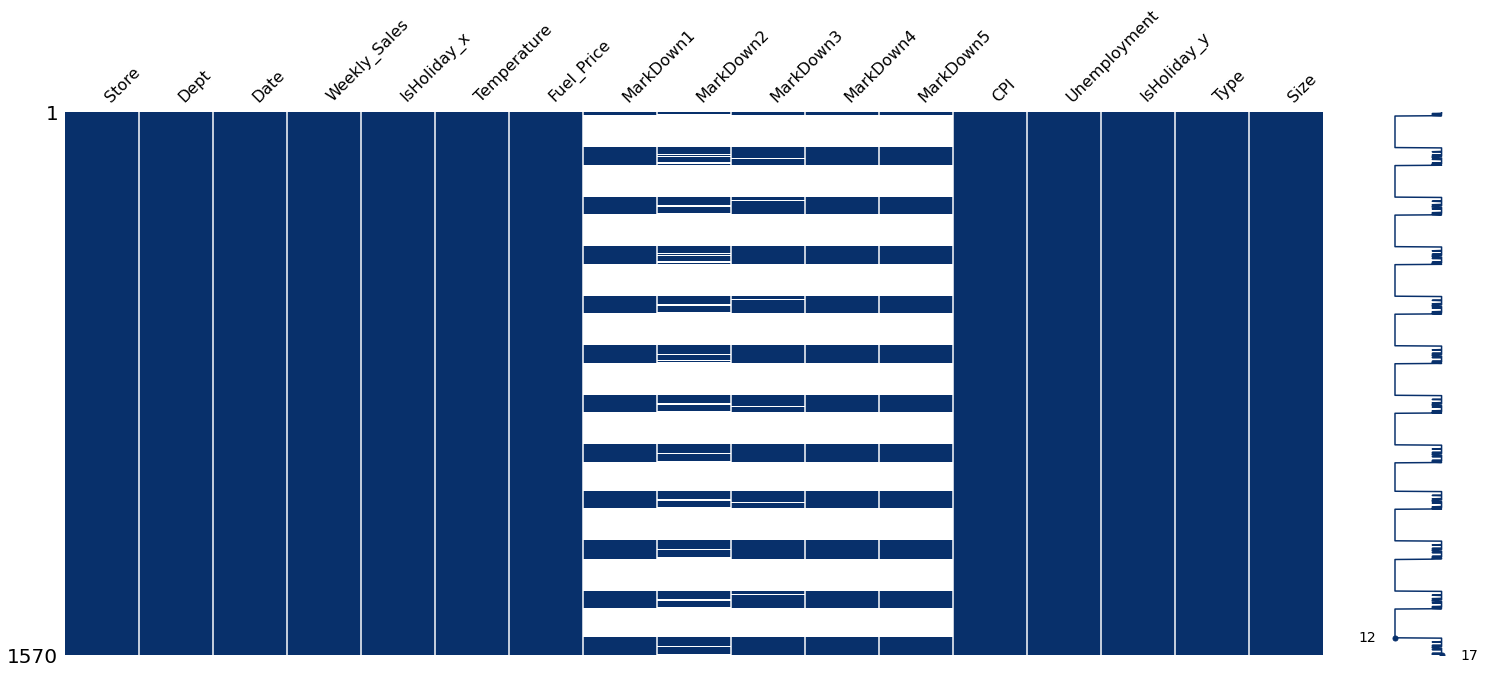

In [16]:

bla = msno.matrix(merged_all.iloc[420000:4250000,:], color=(8/255, 48/255, 107/255))

In [17]:
notnulls = merged_all.isnull().sum()
notnulls = pd.DataFrame(notnulls).reset_index()
notnulls.columns = ['Feature', 'Count']

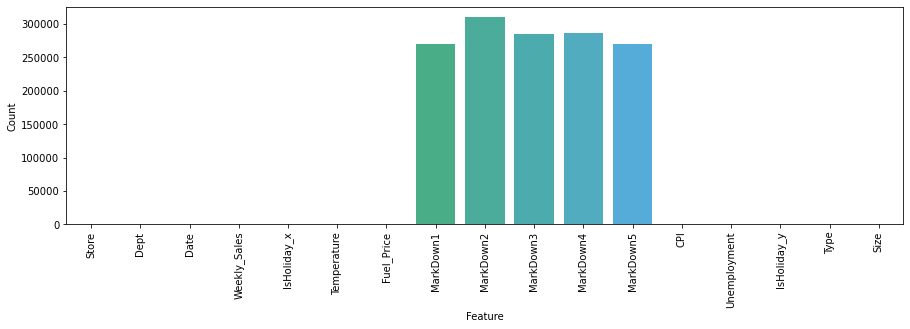

In [18]:
missing_barplot = sns.barplot(data=notnulls, x='Feature', y='Count')
missing_barplot.set_xticklabels(missing_barplot.get_xticklabels(),  rotation=90)
fig = missing_barplot.get_figure()
fig.set_size_inches(15,4)

In [ ]:
sns.pairplot(merged_all)

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


KeyboardInterrupt: 

In [19]:
merged_all.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [20]:
store_stats = features.groupby('Store').mean()
store_stats = store_stats.reset_index()
store_stats.head()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,66.912033,3.259242,8536.592778,3346.401918,1670.797978,3653.631444,4428.307667,217.271679,7.440994,0.071429
1,2,66.728407,3.259242,10395.811778,4952.891067,2314.392247,4396.779333,5961.188778,216.918640,7.403959,0.071429
2,3,70.394176,3.259242,3226.906333,1097.368551,1262.148205,777.115287,1153.349889,220.690122,7.006006,0.071429
3,4,61.416648,3.254885,10516.135556,5022.434800,2337.819886,5370.251818,6173.707667,129.197091,5.647450,0.071429
4,5,68.224505,3.259242,3028.673000,1186.970758,1052.037500,1033.167619,2205.375444,217.844357,6.163166,0.071429


In [21]:
import sklearn

In [22]:
sklearn.__version__

'0.24.2'

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [25]:
scaler.fit(store_stats)
store_stats_normd = scaler.transform(store_stats)
store_stats_normd = pd.DataFrame(store_stats_normd, columns=store_stats.columns)

In [26]:
store_stats_normd.head()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,-1.693979,0.767489,-0.964100,0.396239,0.167362,0.028025,0.443712,0.099188,1.132776,-0.224701,-1.0
1,-1.616980,0.748837,-0.964100,0.876626,1.075021,0.683563,0.848181,0.612691,1.123852,-0.246270,-1.0
2,-1.539981,1.121190,-0.964100,-0.975681,-1.103331,-0.388208,-1.121873,-0.997896,1.219191,-0.478033,-1.0
3,-1.462982,0.209292,-0.992725,0.907715,1.114313,0.707425,1.378007,0.683883,-1.093666,-1.269241,-1.0
4,-1.385983,0.900804,-0.964100,-1.026900,-1.052706,-0.602218,-0.982513,-0.645476,1.147253,-0.968894,-1.0


Text(0, 0.5, 'Temperature')

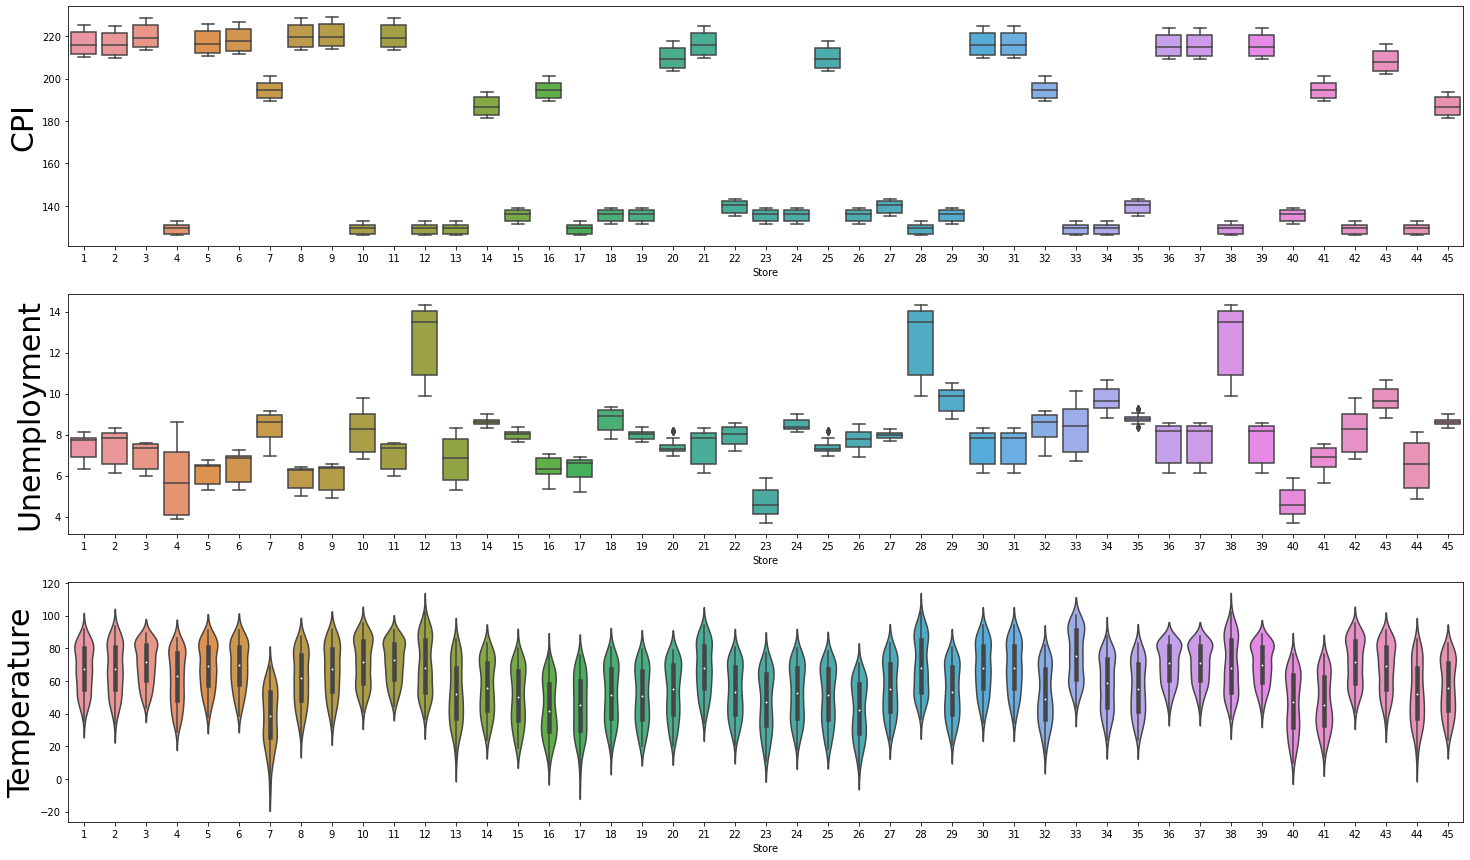

In [27]:
fig, ax = plt.subplots(3,1, figsize=(25,15))
sns.boxplot(ax=ax[0], data=features, x='Store', y='CPI')
sns.boxplot(ax=ax[1], data=features, x='Store', y='Unemployment')
sns.violinplot(ax=ax[2], data=features, x='Store', y='Temperature')
ax[0].set_ylabel(ylabel ='CPI', fontsize=30)
ax[1].set_ylabel(ylabel ='Unemployment', fontsize=30)
ax[2].set_ylabel(ylabel ='Temperature', fontsize=30)

Text(159.0, 0.5, 'Store')

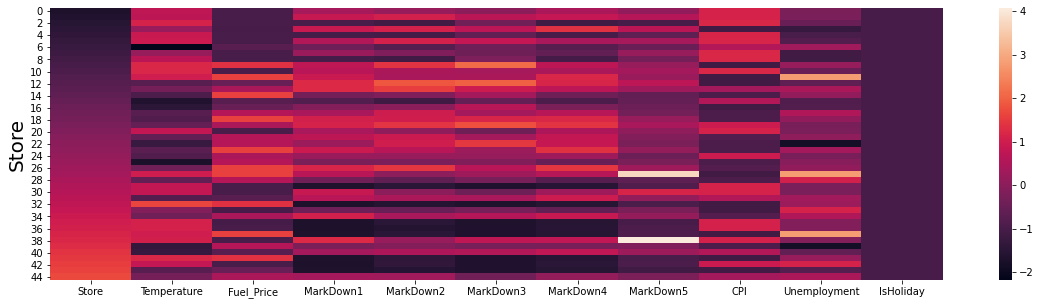

In [28]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(20,5)
ax.set_xlabel('Bla')
sns.heatmap(store_stats_normd)
ax1 = fig.gca()
ax1.set_ylabel('Store', fontsize=20)


In [29]:
def get_holiday(dt): 
    if dt.strftime('%Y-%m-%d') in ['2010-02-12', '2011-02-11','2012-02-10','2012-02-08']: 
        return 'Super Bowl'
    elif  dt.strftime('%Y-%m-%d') in ['2010-09-10', '2011-09-11', '2012-09-12', '2013-09-13']:
        return 'Labor Day'
    elif  dt.strftime('%Y-%m-%d') in ['2010-11-26', '2011-11-25', '2012-11-23', '2013-11-29']:
        return 'Thanksgiving'
    elif dt.strftime('%Y-%m-%d') in ['2010-12-31', '2011-12-30', '2012-12-28', '2013-12-27']:
        return 'Christmas'
       

In [30]:
dt = merged_all['Date'][0]

In [31]:
dt.year

2010

In [32]:
merged_all['Day'] = merged_all['Date'].apply(lambda x: x.day_name())
merged_all['Month'] = merged_all['Date'].apply(lambda x: x.month_name())
merged_all['Year'] = merged_all['Date'].apply(lambda x: x.year)

In [33]:
merged_all['Holiday'] = merged_all['Date'].apply(lambda x: get_holiday(x))

In [34]:
df = merged_all[merged_all['Holiday'].notnull()]

In [35]:
merged_all.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size,Day,Month,Year,Holiday
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,...,NaN,211.096358,8.106,False,A,151315,Friday,February,2010,None
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,...,NaN,211.242170,8.106,True,A,151315,Friday,February,2010,Super Bowl
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,...,NaN,211.289143,8.106,False,A,151315,Friday,February,2010,None
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,...,NaN,211.319643,8.106,False,A,151315,Friday,February,2010,None
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,...,NaN,211.350143,8.106,False,A,151315,Friday,March,2010,None


In [36]:
merged_all['MarkDown1'] = merged_all['MarkDown1'].fillna(0)
merged_all['MarkDown2'] = merged_all['MarkDown2'].fillna(0)
merged_all['MarkDown3'] = merged_all['MarkDown3'].fillna(0)
merged_all['MarkDown4'] = merged_all['MarkDown4'].fillna(0)
merged_all['MarkDown5'] = merged_all['MarkDown5'].fillna(0)

In [37]:
merged_all.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size,Day,Month,Year,Holiday
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,...,0.0,211.096358,8.106,False,A,151315,Friday,February,2010,None
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,...,0.0,211.242170,8.106,True,A,151315,Friday,February,2010,Super Bowl
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,...,0.0,211.289143,8.106,False,A,151315,Friday,February,2010,None
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,...,0.0,211.319643,8.106,False,A,151315,Friday,February,2010,None
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,...,0.0,211.350143,8.106,False,A,151315,Friday,March,2010,None


In [38]:
merged_all['Holiday'] = merged_all['Holiday'].fillna('None')

In [39]:
merged_all = merged_all.drop('Date', axis=1)

In [40]:
X = merged_all.drop('Weekly_Sales', axis=1)
y = merged_all['Weekly_Sales']

In [41]:
from sklearn.model_selection import train_test_split
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [43]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [44]:
pip install "colorama>=0.3.8"

Note: you may need to restart the kernel to use updated packages.


In [45]:
pip install future

Note: you may need to restart the kernel to use updated packages.


In [46]:
pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
Note: you may need to restart the kernel to use updated packages.


In [47]:
import h2o

In [48]:
from h2o.automl import H2OAutoML

In [49]:
h2o.init(max_mem_size='3G', nthreads=4)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.301-b09, mixed mode)
  Starting server from C:\Users\skiaie\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\skiaie\AppData\Local\Temp\tmpvg4c30jf
  JVM stdout: C:\Users\skiaie\AppData\Local\Temp\tmpvg4c30jf\h2o_skiaie_started_from_python.out
  JVM stderr: C:\Users\skiaie\AppData\Local\Temp\tmpvg4c30jf\h2o_skiaie_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,08 secs
H2O_cluster_timezone:,America/Los_Angeles
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.4
H2O_cluster_version_age:,26 days
H2O_cluster_name:,H2O_from_python_skiaie_yu3m46
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.667 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


In [50]:
merged_all_train = X_train.join(y_train)

In [51]:
merged_all.head()

,Store,Dept,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size,Day,Month,Year,Holiday
0,1,1,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,Friday,February,2010,None
1,1,1,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,A,151315,Friday,February,2010,Super Bowl
2,1,1,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,A,151315,Friday,February,2010,None
3,1,1,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,A,151315,Friday,February,2010,None
4,1,1,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,A,151315,Friday,March,2010,None


In [52]:
merged_all.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday_x', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y', 'Type', 'Size',
       'Day', 'Month', 'Year', 'Holiday'],
      dtype='object')

In [53]:
Xh_train = (merged_all.columns).tolist()
training_frame = h2o.H2OFrame(merged_all)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [54]:
auto_ml = H2OAutoML(max_models=10)
auto_ml.train(y='Weekly_Sales', x=merged_all.columns.tolist(), training_frame=training_frame)

AutoML progress: |
10:53:25.863: AutoML: XGBoost is not available; skipping it.

████████████████████████████████████████████████████████| 100%


In [57]:
auto_ml.leaderboard

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20210804_105325,1.76189e+07,4197.48,1.76189e+07,2070.38,nan
StackedEnsemble_BestOfFamily_AutoML_20210804_105325,1.81031e+07,4254.77,1.81031e+07,2198.91,nan
GBM_4_AutoML_20210804_105325,1.84115e+07,4290.86,1.84115e+07,2190.64,nan
GBM_5_AutoML_20210804_105325,2.11426e+07,4598.11,2.11426e+07,1958.37,nan
GBM_3_AutoML_20210804_105325,2.61248e+07,5111.24,2.61248e+07,2722.3,nan
GBM_2_AutoML_20210804_105325,3.09822e+07,5566.16,3.09822e+07,3012.07,nan
GBM_1_AutoML_20210804_105325,3.69657e+07,6079.94,3.69657e+07,3376.91,nan
DRF_1_AutoML_20210804_105325,4.2245e+07,6499.62,4.2245e+07,3447.46,nan
GBM_grid__1_AutoML_20210804_105325_model_1,4.98933e+07,7063.52,4.98933e+07,3931.98,nan
XRT_1_AutoML_20210804_105325,8.99449e+07,9483.93,8.99449e+07,5540.48,nan


[Text(0, 0, 'StackedEnsemble_AllModels_AutoML_20210804_105325'),
 Text(1, 0, 'StackedEnsemble_BestOfFamily_AutoML_20210804_105325'),
 Text(2, 0, 'GBM_4_AutoML_20210804_105325'),
 Text(3, 0, 'GBM_5_AutoML_20210804_105325'),
 Text(4, 0, 'GBM_3_AutoML_20210804_105325'),
 Text(5, 0, 'GBM_2_AutoML_20210804_105325'),
 Text(6, 0, 'GBM_1_AutoML_20210804_105325'),
 Text(7, 0, 'DRF_1_AutoML_20210804_105325'),
 Text(8, 0, 'GBM_grid__1_AutoML_20210804_105325_model_1'),
 Text(9, 0, 'XRT_1_AutoML_20210804_105325'),
 Text(10, 0, 'DeepLearning_1_AutoML_20210804_105325'),
 Text(11, 0, 'GLM_1_AutoML_20210804_105325')]

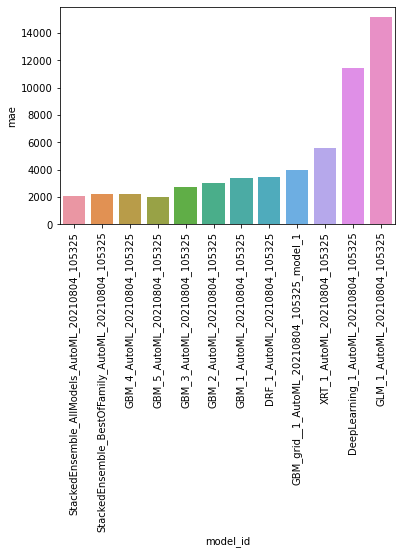

In [66]:
bar = sns.barplot(data=auto_ml.leaderboard.as_data_frame(), y='mae', x='model_id')
labels=bar.get_xticklabels()
bar.set_xticklabels(rotation=90, labels=labels)


In [1]:
h2o.getModel()

NameError: name 'h2o' is not defined